In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
hmw1 = pd.read_excel('dados_hmw_1.xlsx')
display(hmw1)

,Serie_1,Serie_2,Serie_3,Serie_4
0,1.232695,7457.103753,1.218120,-2.896247
1,-1.561489,7461.781841,-1.199454,-3.218159
2,0.257000,7466.000522,1.366425,-3.999478
3,0.527445,7472.274049,-0.877895,-2.725951
4,0.135809,7478.081279,0.367108,-1.918721
...,...,...,...,...
144,-0.084329,8182.675933,0.738805,2.675933
145,0.345020,8187.719859,0.005392,2.719859
146,-1.222299,8191.509180,-1.298195,1.509180
147,-1.158261,8194.191110,-0.847743,-0.808890


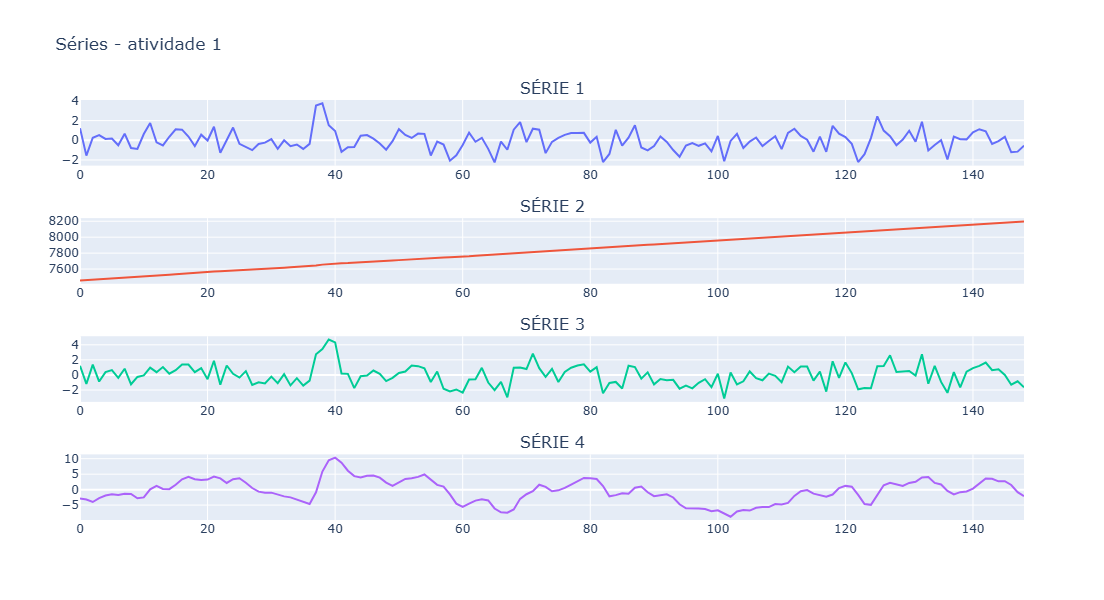

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando a figura com subplots
fig = make_subplots(rows=4, cols=1, subplot_titles=('SÉRIE 1', 'SÉRIE 2', 'SÉRIE 3', 'SÉRIE 4'))

# Adicionando as séries temporais aos subplots
fig.add_trace(go.Scatter(x=hmw1.index, y=hmw1['Serie_1'], name='Série 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=hmw1.index, y=hmw1['Serie_2'], name='Série 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=hmw1.index, y=hmw1['Serie_3'], name='Série 3'), row=3, col=1)
fig.add_trace(go.Scatter(x=hmw1.index, y=hmw1['Serie_4'], name='Série 4'), row=4, col=1)

# Atualizando o layout da figura
fig.update_layout(height=600, width=800, title_text="Séries - atividade 1", showlegend=False)

# Exibindo a figura
fig.show()

#### ii. Verificar se as séries possuem tendência. Se sim, você deve usar uma de duas abordagens antes
de prosseguir:

**a**. Remover antes de aplicar a metodologia BJ.   

**b**. Incluir a tendência, se for o caso, na estimação do modelo.

Aparentemente, apenas a segunda série tem tendência. Dessa forma, vou estimar o modelo com tendência.

#### iii. Aplicar a metodologia BJ: identificar, estimar e verificar (faça os testes de diagnóstico)

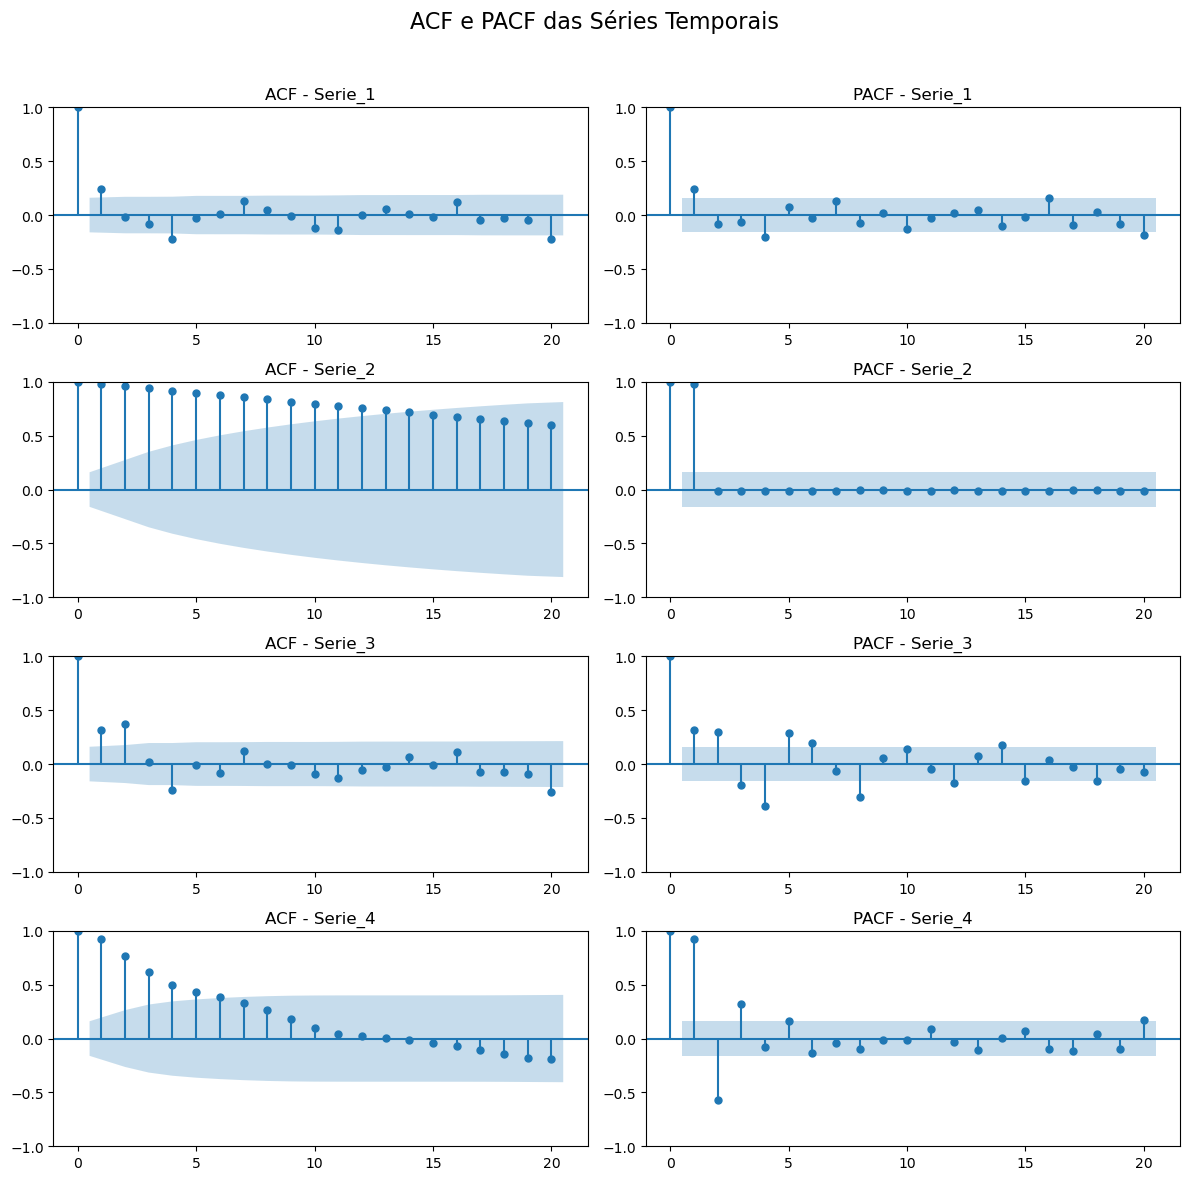

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle('ACF e PACF das Séries Temporais', fontsize=16)

# Lista das séries
series = ['Serie_1', 'Serie_2', 'Serie_3', 'Serie_4']

# Loop para plotar ACF e PACF de cada série
for i, serie in enumerate(series):
    # ACF
    plot_acf(hmw1[serie], ax=axes[i, 0], lags=20, title=f'ACF - {serie}')
    # PACF
    plot_pacf(hmw1[serie], ax=axes[i, 1], lags=20, title=f'PACF - {serie}')

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para evitar sobreposição
plt.show()

### Identificação

#### Serie 1: 
A ACF tem um salto na primeira defasagem e é zero para as demais, exceto as defasagens 4 e 12. A PACF tem comportamento semelhante. MA(1)

#### Serie 2:
A ACF decai exponencialmente em direção ao zero, enquanto a PACF salta para zero após a primeira defasagem. Aparenta bastante um processo AR(1) teórico

#### Serie 3:
O ACF decai a zero após a 2° defasagem Enquanto o PACF mesmo após várias defasagens, tem valores diferentes de zero. ARMA(6,2)?

#### Serie 4:
Aparenta bastante um processo AR(3) ou AR(4) teórico

#### SÉRIE 1

In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# separando os dados em treinamento e teste, e rodando um arima(1,0,0)

dados = hmw1['Serie_1']

# Separando 75% para treino e 25% para teste
tamanho_treino = int(len(dados) * 0.75)
treino, teste = dados[:tamanho_treino], dados[tamanho_treino:]

# Estimando o modelo ARIMA(0,0,1)
modelo = ARIMA(treino, order=(3, 0, 2))
resultado = modelo.fit()

print(resultado.summary())                   # resultado com 75% dos dados

                               SARIMAX Results                                
Dep. Variable:                Serie_1   No. Observations:                  111
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -151.877
Date:                Fri, 21 Mar 2025   AIC                            317.754
Time:                        18:20:17   BIC                            336.721
Sample:                             0   HQIC                           325.448
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0429      0.108     -0.397      0.691      -0.255       0.169
ar.L1          0.0879      0.745      0.118      0.906      -1.372       1.548
ar.L2          0.5854      0.493      1.189      0.2

In [68]:
# Previsão dos 25% restantes (sem previsão constante)
previsao_teste = resultado.predict(start=tamanho_treino, end=len(hmw1) - 1)
print(previsao_teste)

111   -0.167377
112   -0.080497
113    0.025827
114   -0.037754
115    0.004148
116   -0.047433
117   -0.016648
118   -0.051247
119   -0.027514
120   -0.050905
121   -0.033196
122   -0.049360
123   -0.036445
124   -0.047777
125   -0.038470
126   -0.046477
127   -0.039809
128   -0.045490
129   -0.040727
130   -0.044766
131   -0.041368
132   -0.044242
133   -0.041821
134   -0.043867
135   -0.042141
136   -0.043598
137   -0.042369
138   -0.043407
139   -0.042531
140   -0.043270
141   -0.042647
142   -0.043173
143   -0.042729
144   -0.043104
145   -0.042787
146   -0.043054
147   -0.042829
148   -0.043019
Name: predicted_mean, dtype: float64


In [70]:
# Fazendo previsões para os próximos 12 períodos
previsao = resultado.forecast(steps=12)

print("Previsão para os próximos 12 períodos:")
print(previsao)

Previsão para os próximos 12 períodos:
111   -0.167377
112   -0.080497
113    0.025827
114   -0.037754
115    0.004148
116   -0.047433
117   -0.016648
118   -0.051247
119   -0.027514
120   -0.050905
121   -0.033196
122   -0.049360
Name: predicted_mean, dtype: float64


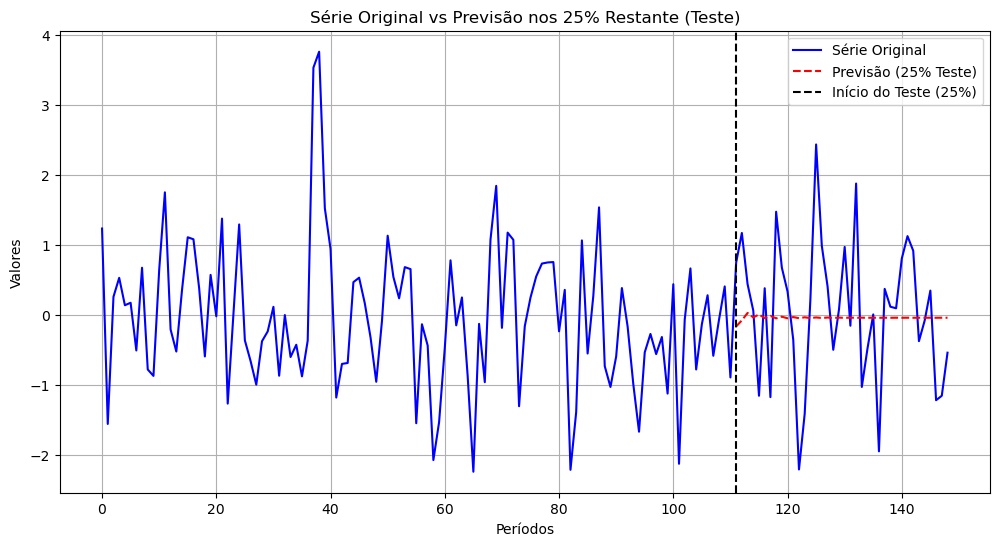

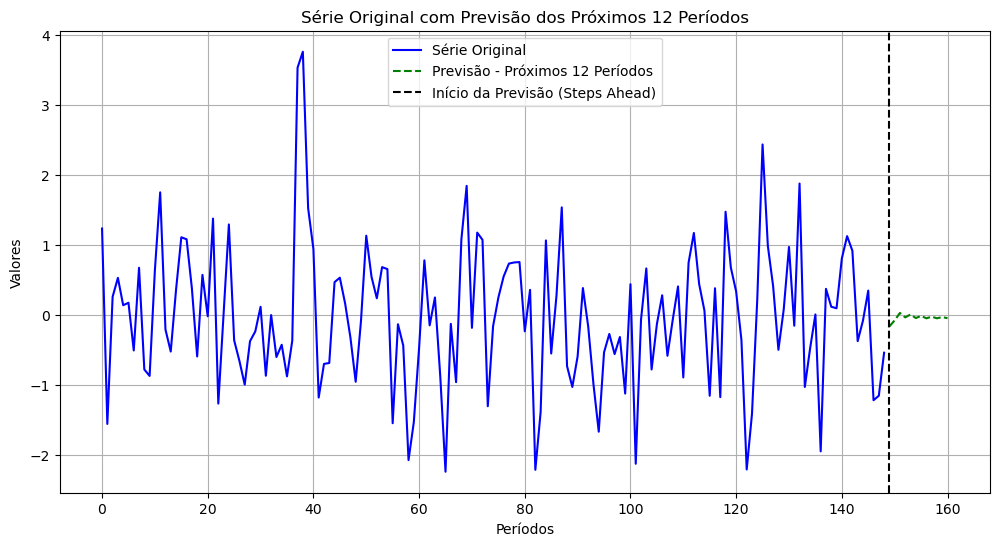

In [72]:
import matplotlib.pyplot as plt

# Plot da série original vs previsão nos 25% restantes (teste)
plt.figure(figsize=(12, 6))
plt.plot(dados, label='Série Original', color='blue')
plt.plot(range(tamanho_treino, len(dados)), resultado.predict(start=tamanho_treino, end=len(dados) - 1), label='Previsão (25% Teste)', color='red', linestyle='--')
plt.axvline(x=tamanho_treino, color='black', linestyle='--', label='Início do Teste (25%)')
plt.legend()
plt.title('Série Original vs Previsão nos 25% Restante (Teste)')
plt.xlabel('Períodos')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

# Plot da série original com a previsão dos próximos 12 períodos (steps ahead)
plt.figure(figsize=(12, 6))
plt.plot(dados, label='Série Original', color='blue')
plt.plot(range(len(dados), len(dados) + 12), previsao, label='Previsão - Próximos 12 Períodos', color='green', linestyle='--')
plt.axvline(x=len(dados), color='black', linestyle='--', label='Início da Previsão (Steps Ahead)')
plt.legend()
plt.title('Série Original com Previsão dos Próximos 12 Períodos')
plt.xlabel('Períodos')
plt.ylabel('Valores')
plt.grid(True)
plt.show()
